End-to-end ML Project - Food Delivery Time Prediction Model

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [357]:
print("Mirza Abubacker - 261233989")

Mirza Abubacker - 261233989


This project requires Python 3.7 or above:

In [185]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [186]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Get the Data

We are predicting delivery times with variables like Distance_km, Weather, Traffic_Level, Time_of_Day, Vehicle_Type, Preparation_Time_min, Courier_Experience_yrs 

## Download the Data

In [282]:
from pathlib import Path
import pandas as pd


df = pd.read_csv("Food_Delivery_Times.csv")

## Take a Quick Look at the Data Structure

In [283]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [289]:
df = df.drop(columns=["Order_ID"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             1000 non-null   float64
 1   Weather                 970 non-null    object 
 2   Traffic_Level           970 non-null    object 
 3   Time_of_Day             970 non-null    object 
 4   Vehicle_Type            1000 non-null   object 
 5   Preparation_Time_min    1000 non-null   int64  
 6   Courier_Experience_yrs  970 non-null    float64
 7   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [290]:
df["Vehicle_Type"].value_counts()

Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64

In [291]:
df.describe()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,970.000000,1000.000000
mean,10.059970,16.982000,4.579381,56.732000
std,5.696656,7.204553,2.914394,22.070915
min,0.590000,5.000000,0.000000,8.000000
25%,5.105000,11.000000,2.000000,41.000000
50%,10.190000,17.000000,5.000000,55.500000
75%,15.017500,23.000000,7.000000,71.000000
max,19.990000,29.000000,9.000000,153.000000


In [292]:
#Save plots to local folder
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

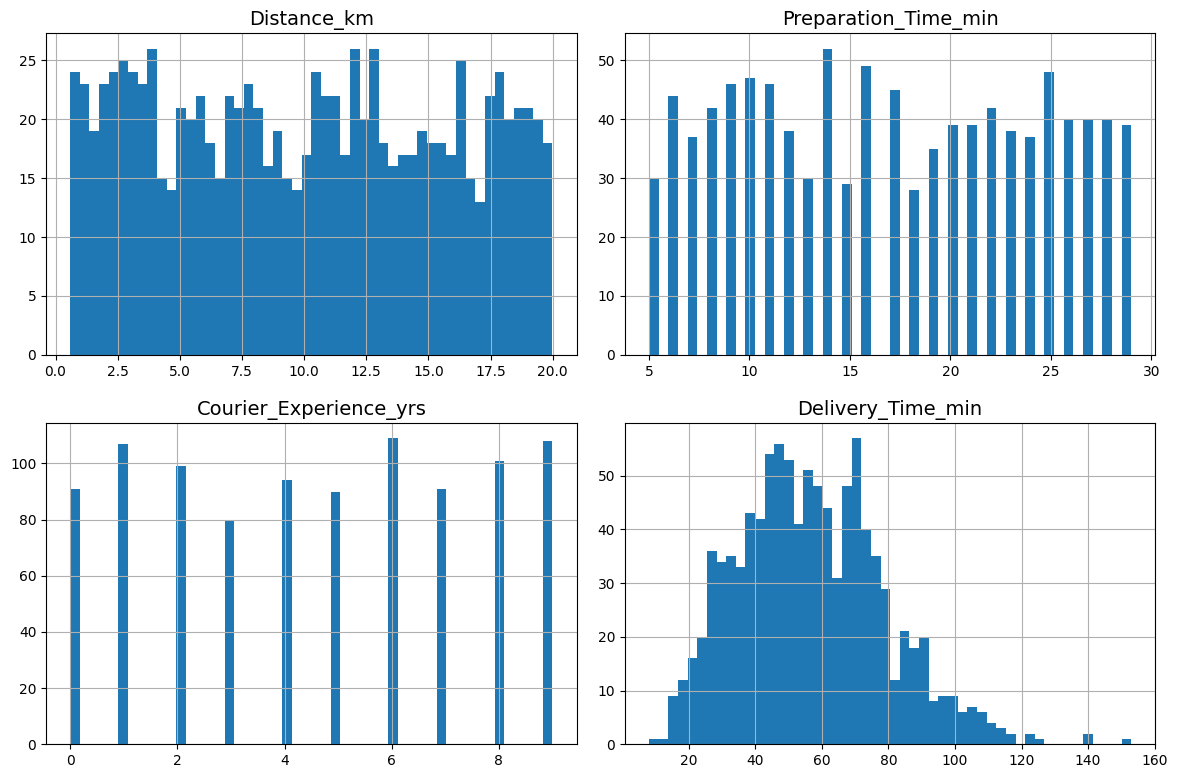

In [293]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

## Create a Test Set

In [294]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [295]:
print(test_set["Weather"].isnull().sum())

8


# Discover and Visualize the Data to Gain Insights

### Visualizing Correlation Between Distance_km and Delivery_Time_min

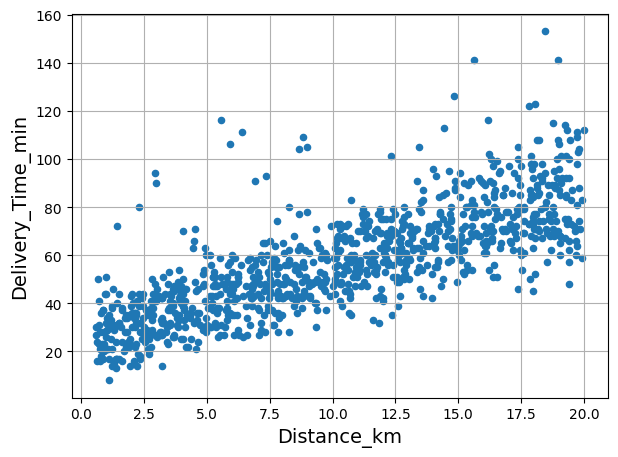

In [196]:
df.plot(kind="scatter", x="Distance_km", y="Delivery_Time_min", grid=True)
save_fig("bad_visualization_plot")  # extra code
plt.show()

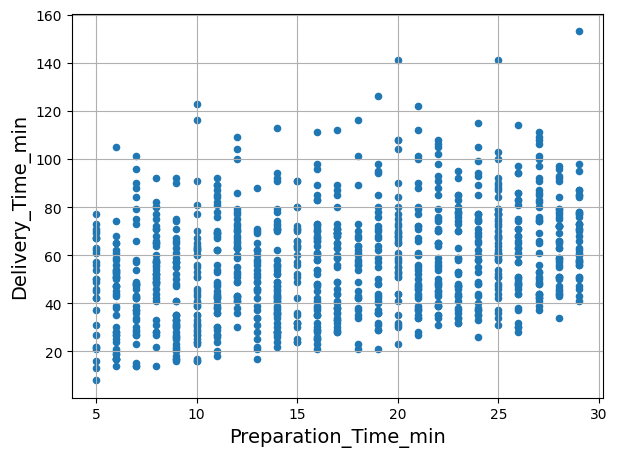

In [296]:
df.plot(kind="scatter", x="Preparation_Time_min", y="Delivery_Time_min", grid=True)
save_fig("bad_visualization_plot")  # extra code
plt.show()

## Looking for Correlations

Note: since Pandas 2.0.0, the `numeric_only` argument defaults to `False`, so we need to set it explicitly to True to avoid an error.

In [297]:
corr_matrix = df.corr(numeric_only=True)

In [298]:
corr_matrix["Delivery_Time_min"].sort_values(ascending=False)

Delivery_Time_min         1.000000
Distance_km               0.780998
Preparation_Time_min      0.307350
Courier_Experience_yrs   -0.090433
Name: Delivery_Time_min, dtype: float64

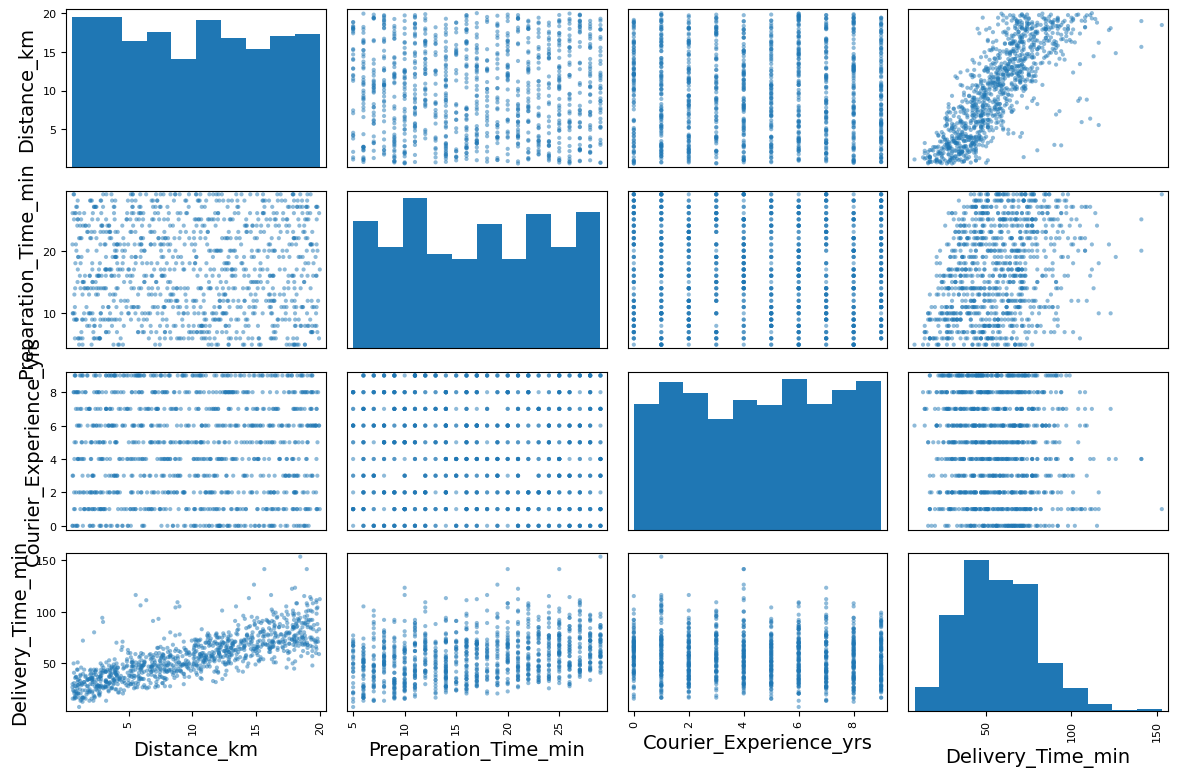

In [299]:
from pandas.plotting import scatter_matrix

attributes = ["Distance_km", "Preparation_Time_min", "Courier_Experience_yrs",
              "Delivery_Time_min"]
scatter_matrix(df[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

# Prepare the Data for Machine Learning Algorithms

In [304]:
df = train_set.drop("Delivery_Time_min", axis = 1)
df_labels = train_set["Delivery_Time_min"].copy()

## Data Cleaning

In [305]:
null_rows_idx = df.isnull().any(axis=1)
df.loc[null_rows_idx].head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs
141,19.35,Clear,High,NaN,Bike,12,7.0
231,7.54,Snowy,Low,Afternoon,Bike,20,NaN
323,1.22,Clear,Medium,Evening,Scooter,6,NaN
731,9.24,Windy,NaN,Afternoon,Bike,8,2.0
380,13.09,Windy,Low,NaN,Scooter,17,1.0


Replacing the missing values in the categorical columns with the mode of each respective column - that is, the most common value

In [306]:
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)
df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0], inplace=True)
df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0], inplace=True)

C:\Users\abmir\AppData\Local\Temp\ipykernel_5968\3226538409.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)
C:\Users\abmir\AppData\Local\Temp\ipykernel_5968\3226538409.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [307]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Separating out the numerical attributes to use the `"median"` strategy.

In [308]:
import numpy as np
df_num = df.select_dtypes(include=[np.number])

Transform the training set:

In [309]:
X = imputer.fit_transform(df_num)

In [310]:
imputer.feature_names_in_

array(['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs'],
      dtype=object)

In [311]:
df_tr = pd.DataFrame(X, columns=df_num.columns,
                          index=df_num.index)

In [312]:
df_tr.loc[null_rows_idx].head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs
141,19.35,12.0,7.0
231,7.54,20.0,5.0
323,1.22,6.0,5.0
731,9.24,8.0,2.0
380,13.09,17.0,1.0


Now let's drop some outliers:

In [313]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [314]:
outlier_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,
       -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,
        1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,
        1,  1, -1, -1, -1

If you wanted to drop outliers, you would run the following code:

In [315]:
df = df.iloc[outlier_pred == 1]
df_labels = df_labels.iloc[outlier_pred == 1]

## Handling Text and Categorical Attributes

In [316]:
#select all categorical columns
df_cat = df.select_dtypes(include=[np.object_])
df_cat.head(8)

,Weather,Traffic_Level,Time_of_Day,Vehicle_Type
65,Clear,Low,Evening,Bike
305,Clear,High,Morning,Car
975,Clear,Low,Evening,Scooter
231,Snowy,Low,Afternoon,Bike
963,Clear,Low,Afternoon,Bike
77,Clear,Low,Afternoon,Scooter
991,Clear,Low,Afternoon,Bike
900,Windy,Medium,Afternoon,Car


Using ordinal encoder to encode only the column with ordinal data: Traffic_Level

In [317]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
#Use ordinal encoder to convert column 'Traffic_Level' to numerical values
df_cat_encoded = ordinal_encoder.fit_transform(df_cat[['Traffic_Level']])

In [318]:
df_cat_encoded[:8]

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.]])

In [319]:
ordinal_encoder.categories_

[array(['High', 'Low', 'Medium'], dtype=object)]

In [320]:
from sklearn.preprocessing import OneHotEncoder
#Use onehot encoder to convert the other categorical columns to numerical values
cat_encoder = OneHotEncoder()
#Convert all columns in df_cat to numerical values except 'Traffic_Level'
df_cat_1hot = cat_encoder.fit_transform(df_cat.drop('Traffic_Level', axis=1))


In [321]:
df_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 516 stored elements and shape (172, 12)>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [322]:
df_cat_1hot_array = df_cat_1hot.toarray()

## Feature Scaling

In [323]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
df_num_min_max_scaled = min_max_scaler.fit_transform(df_num)

In [324]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_num_std_scaled = std_scaler.fit_transform(df_num)

## Transformation Pipelines

Now let's build a pipeline to preprocess the numerical attributes:

In [325]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [326]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [327]:
df_num_prepared = num_pipeline.fit_transform(df_num)
df_num_prepared[:2].round(2)

array([[ 1.39, -0.98,  0.82],
       [-1.39,  0.13, -0.56]])

In [328]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Distance_km", "Preparation_Time_min", "Courier_Experience_yrs"]
cat_attribs_one_hot = ["Weather", "Time_of_Day", "Vehicle_Type"]
cat_attribs_ordinal = ["Traffic_Level"]

from sklearn.pipeline import make_pipeline

cat_pipeline_one_hot = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

cat_pipeline_ordinal = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('ordinal', OrdinalEncoder())
])


preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("catonehot", cat_pipeline_one_hot, cat_attribs_one_hot),
    ("catordinal", cat_pipeline_ordinal, cat_attribs_ordinal)
])

In [329]:
housing_prepared = preprocessing.fit_transform(df)

# Select and Train a Model

## Training and Evaluating on the Training Set

In [330]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(df, df_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Distance_km',
                                                   'Preparation_Time_min',
                                                   'Courier_Experience_yrs']),
                                                 ('catonehot',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Weather', 'Time_of_Day',
                                                   'Vehicle_Type']),
                                                 ('catordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Traffic_Level'])])),
                ('linearregression', LinearRegression())])

Let's try the full preprocessing pipeline on a few training instances:

In [331]:
df_predictions = lin_reg.predict(df)
df_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([100., 100., 100., 100., 100.])

Compare against the actual values:

In [332]:
df_labels.iloc[:5].values

array([52, 63, 39, 55, 56])

In [333]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(df_labels, df_predictions,
                              squared=False)
lin_rmse

c:\Users\abmir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(12.902403259219218)

In [334]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(df, df_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Distance_km',
                                                   'Preparation_Time_min',
                                                   'Courier_Experience_yrs']),
                                                 ('catonehot',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Weather', 'Time_of_Day',
                                                   'Vehicle_Type']),
                                                 ('catordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Traffic_Level'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [335]:
df_predictions = tree_reg.predict(df)
tree_rmse = mean_squared_error(df_labels, df_predictions,
                              squared=False)
tree_rmse

c:\Users\abmir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(0.0)

## Better Evaluation Using Cross-Validation

In [336]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, df, df_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [337]:
pd.Series(tree_rmses).describe()

count    10.000000
mean     18.966307
std       3.695489
min      12.452262
25%      17.039034
50%      19.534679
75%      21.444776
max      24.743389
dtype: float64

In [338]:
# extra code – computes the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, df, df_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count    10.000000
mean     12.998082
std       5.441187
min       7.230075
25%       7.842303
50%      12.567532
75%      17.688323
max      20.624975
dtype: float64

**Warning:** the following cell may take a few minutes to run:

In [339]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, df, df_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [340]:
pd.Series(forest_rmses).describe()

count    10.000000
mean     14.192984
std       4.494796
min       7.709388
25%      10.913997
50%      14.079407
75%      17.361472
max      20.572324
dtype: float64

Let's compare this RMSE measured using cross-validation (the "validation error") with the RMSE measured on the training set (the "training error"):

In [341]:
forest_reg.fit(df, df_labels)
df_predictions = forest_reg.predict(df)
forest_rmse = mean_squared_error(df_labels, df_predictions,
                                 squared=False)
forest_rmse

c:\Users\abmir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(5.572690260922999)

# Fine-Tune Your Model

## Grid Search

**Warning:** the following cell may take a few minutes to run:

In [342]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'random_forest__max_features': [4, 6, 8]},
    {'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(df, df_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Distance_km',
                                                                          'Preparation_Time_min',
                                                                          'Courier_Experience_yrs']),
                                                                        ('catonehot',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('o...
                                                                          'Time_of_Day',
                                                                          'Vehicle_Type']),
                                                                        ('catordinal',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinal',
                                                                                          OrdinalEncoder())]),
                                                                         ['Traffic_Level'])])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'random_forest__max_features': [4, 6, 8]},
                         {'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

You can get the full list of hyperparameters available for tuning by looking at `full_pipeline.get_params().keys()`:

In [343]:
# extra code – shows part of the output of get_params().keys()
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__force_int_remainder_cols', 'preprocessing__n_jobs', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'preprocessing__num', 'preprocessing__catonehot', 'preprocessing__catordinal', 'preprocessing__num__memory', 'preprocessing__num__steps', 'preprocessing__num__verbose', 'preprocessing__num__impute', 'preprocessing__num__standardize', 'preprocessing__num__impute__add_indicator', 'preprocessing__num__impute__copy', 'preprocessing__num__impute__fill_value', 'preprocessing__num__impute__keep_empty_features', 'preprocessing__num__impute__missing_values', 'preprocessing__num__impute__strategy', 'preprocessing__num__standardize__copy', 'preprocessing__num__standardize__with_mean', 'preprocessing__num__standardize__with_std', 'preprocessing__catonehot__me

The best hyperparameter combination found:

In [344]:
grid_search.best_params_

{'random_forest__max_features': 8}

In [345]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Distance_km',
                                                   'Preparation_Time_min',
                                                   'Courier_Experience_yrs']),
                                                 ('catonehot',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Weather', 'Time_of_Day',
                                                   'Vehicle_Type']),
                                                 ('catordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Traffic_Level'])])),
                ('random_forest',
                 RandomForestRegressor(max_features=8, random_state=42))])

Let's look at the score of each hyperparameter combination tested during the grid search:

In [346]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,0.100322,0.000677,0.007869,0.000702,8,{'random_forest__max_features': 8},-13.949475,-17.283572,-11.793586,-14.342211,2.258417,1
2,0.098894,0.001679,0.008404,0.000321,8,{'random_forest__max_features': 8},-13.949475,-17.283572,-11.793586,-14.342211,2.258417,1
5,0.103770,0.001200,0.008645,0.000444,10,{'random_forest__max_features': 10},-13.845222,-17.135220,-12.328760,-14.436400,2.006262,3
1,0.098429,0.001781,0.008928,0.001530,6,{'random_forest__max_features': 6},-14.144087,-16.927796,-12.262135,-14.444673,1.916570,4
3,0.097863,0.003334,0.008412,0.001983,6,{'random_forest__max_features': 6},-14.144087,-16.927796,-12.262135,-14.444673,1.916570,4


## Randomized Search

In [347]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

Try 30 (`n_iter` × `cv`) random combinations of hyperparameters:

**Warning:** the following cell may take a few minutes to run:

In [348]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(df, df_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardize',
                                                                                                StandardScaler())]),
                                                                               ['Distance_km',
                                                                                'Preparation_Time_min',
                                                                                'Courier_Experience_yrs']),
                                                                              ('catonehot',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent'...
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ordinal',
                                                                                                OrdinalEncoder())]),
                                                                               ['Traffic_Level'])])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DB04FC53D0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [349]:
# extra code – displays the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
# cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
8,0.107795,0.005966,0.007982,0.000177,9,{'random_forest__max_features': 9},-13.843173,-16.678075,-12.067114,-14.196120,1.898889,1
3,0.101143,0.001231,0.004969,0.002529,9,{'random_forest__max_features': 9},-13.843173,-16.678075,-12.067114,-14.196120,1.898889,1
4,0.097597,0.003858,0.009899,0.003596,8,{'random_forest__max_features': 8},-13.949475,-17.283572,-11.793586,-14.342211,2.258417,3
0,0.110205,0.014667,0.008413,0.001198,8,{'random_forest__max_features': 8},-13.949475,-17.283572,-11.793586,-14.342211,2.258417,3
5,0.119720,0.005557,0.008241,0.000202,12,{'random_forest__max_features': 12},-13.904927,-16.777078,-12.397867,-14.359958,1.816528,5


## Analyze the Best Models and Their Errors

In [350]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.49, 0.18, 0.11, 0.03, 0.01, 0.04, 0.01, 0.  , 0.01, 0.01, 0.02,
       0.01, 0.01, 0.01, 0.02, 0.03])

In [351]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(np.float64(0.48922753027000837), 'num__Distance_km'),
 (np.float64(0.17543455260848892), 'num__Preparation_Time_min'),
 (np.float64(0.10669286421073636), 'num__Courier_Experience_yrs'),
 (np.float64(0.03737045556429028), 'catonehot__Weather_Rainy'),
 (np.float64(0.033357228479203804), 'catordinal__Traffic_Level'),
 (np.float64(0.029560638493503263), 'catonehot__Weather_Clear'),
 (np.float64(0.01898883705590846), 'catonehot__Vehicle_Type_Scooter'),
 (np.float64(0.016569320222562675), 'catonehot__Time_of_Day_Morning'),
 (np.float64(0.014953393353296578), 'catonehot__Weather_Snowy'),
 (np.float64(0.01367005411769801), 'catonehot__Time_of_Day_Afternoon'),
 (np.float64(0.013290204589787464), 'catonehot__Time_of_Day_Evening'),
 (np.float64(0.013056830653165614), 'catonehot__Time_of_Day_Night'),
 (np.float64(0.012867398331760321), 'catonehot__Weather_Foggy'),
 (np.float64(0.012678726058982726), 'catonehot__Vehicle_Type_Bike'),
 (np.float64(0.008074279258740711), 'catonehot__Vehicle_Type_Car

## Evaluate Your System on the Test Set

In [352]:
X_test = test_set.drop("Delivery_Time_min", axis=1)
y_test = test_set["Delivery_Time_min"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

12.660635035415877


c:\Users\abmir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


We can compute a 95% confidence interval for the test RMSE:

In [353]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([11.18100047, 13.98458392])

## Model persistence using joblib

Save the final model:

In [354]:
import joblib

joblib.dump(final_model, "food_delivery_model.pkl")

['food_delivery_model.pkl']

Now you can deploy this model to production. For example, the following code could be a script that would run in production:

In [355]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("food_delivery_model.pkl")

new_data = df.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [356]:
predictions

array([54.16, 62.14, 47.65, 56.27, 57.21])

You could use pickle instead, but joblib is more efficient.

# Exercise solutions

## 1.

Exercise: _Try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don't worry about what the hyperparameters mean for now (see the SVM notebook if you're interested). How does the best `SVR` predictor perform?_

In [263]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'svr__kernel': ['linear'], 'svr__C': [10., 30., 100., 300., 1000.,
                                               3000., 10000., 30000.0]},
        {'svr__kernel': ['rbf'], 'svr__C': [1.0, 3.0, 10., 30., 100., 300.,
                                            1000.0],
         'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svr_pipeline = Pipeline([("preprocessing", preprocessing), ("svr", SVR())])
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(df.iloc[:5000], df_labels.iloc[:5000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Distance_km',
                                                                          'Preparation_Time_min',
                                                                          'Courier_Experience_yrs']),
                                                                        ('catonehot',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('o...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinal',
                                                                                          OrdinalEncoder())]),
                                                                         ['Traffic_Level'])])),
                                       ('svr', SVR())]),
             param_grid=[{'svr__C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                     10000.0, 30000.0],
                          'svr__kernel': ['linear']},
                         {'svr__C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0,
                                     1000.0],
                          'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'svr__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error')

The best model achieves the following score (evaluated using 3-fold cross validation):

In [264]:
svr_grid_search_rmse = -grid_search.best_score_
svr_grid_search_rmse

np.float64(10.572083823233342)

That's much worse than the `RandomForestRegressor` (but to be fair, we trained the model on much less data). Let's check the best hyperparameters found:

In [265]:
grid_search.best_params_

{'svr__C': 100.0, 'svr__gamma': 0.03, 'svr__kernel': 'rbf'}

The linear kernel seems better than the RBF kernel. Notice that the value of `C` is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for `C` (removing the smallest values), because it is likely that higher values of `C` will be better.

## 2.

Exercise: _Try replacing the `GridSearchCV` with a `RandomizedSearchCV`._

**Warning:** the following cell will take several minutes to run. You can specify `verbose=2` when creating the `RandomizedSearchCV` if you want to see the training details.

In [266]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, loguniform

param_distribs = {
        'svr__kernel': ['linear', 'rbf'],
        'svr__C': loguniform(20, 200_000),
        'svr__gamma': expon(scale=1.0),
    }

rnd_search = RandomizedSearchCV(svr_pipeline,
                                param_distributions=param_distribs,
                                n_iter=50, cv=3,
                                scoring='neg_root_mean_squared_error',
                                random_state=42)
rnd_search.fit(df.iloc[:5000], df_labels.iloc[:5000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardize',
                                                                                                StandardScaler())]),
                                                                               ['Distance_km',
                                                                                'Preparation_Time_min',
                                                                                'Courier_Experience_yrs']),
                                                                              ('catonehot',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent'...
                                                                                                OrdinalEncoder())]),
                                                                               ['Traffic_Level'])])),
                                             ('svr', SVR())]),
                   n_iter=50,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001DB00039370>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001DB7B3B4860>,
                                        'svr__kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_root_mean_squared_error')

The best model achieves the following score (evaluated using 3-fold cross validation):

In [267]:
svr_rnd_search_rmse = -rnd_search.best_score_
svr_rnd_search_rmse

np.float64(10.732626245975604)

Now that's really much better, but still far from the `RandomForestRegressor`'s performance. Let's check the best hyperparameters found:

In [270]:
rnd_search.best_params_

{'svr__C': np.float64(113564.03940586244),
 'svr__gamma': np.float64(0.0007790692366582295),
 'svr__kernel': 'rbf'}

This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.

Note that we used the `expon()` distribution for `gamma`, with a scale of 1, so `RandomSearch` mostly searched for values roughly of that scale: about 80% of the samples were between 0.1 and 2.3 (roughly 10% were smaller and 10% were larger):

In [271]:
np.random.seed(42)

s = expon(scale=1).rvs(100_000)  # get 100,000 samples
((s > 0.105) & (s < 2.29)).sum() / 100_000

np.float64(0.80066)

We used the `loguniform()` distribution for `C`, meaning we did not have a clue what the optimal scale of `C` was before running the random search. It explored the range from 20 to 200 just as much as the range from 2,000 to 20,000 or from 20,000 to 200,000.

## 3.

Exercise: _Try adding a `SelectFromModel` transformer in the preparation pipeline to select only the most important attributes._

Let's create a new pipeline that runs the previously defined preparation pipeline, and adds a `SelectFromModel` transformer based on a `RandomForestRegressor` before the final regressor:

In [272]:
from sklearn.feature_selection import SelectFromModel

selector_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('selector', SelectFromModel(RandomForestRegressor(random_state=42),
                                 threshold=0.005)),  # min feature importance
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [273]:
selector_rmses = -cross_val_score(selector_pipeline,
                                  df.iloc[:5000],
                                  df_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(selector_rmses).describe()

count     3.000000
mean     10.721450
std       0.641145
min      10.318357
25%      10.351788
50%      10.385218
75%      10.922996
max      11.460773
dtype: float64

Oh well, feature selection does not seem to help. But maybe that's just because the threshold we used was not optimal. Perhaps try tuning it using random search or grid search?

## 4.

Exercise: _Try creating a custom transformer that trains a k-Nearest Neighbors regressor (`sklearn.neighbors.KNeighborsRegressor`) in its `fit()` method, and outputs the model's predictions in its `transform()` method. Then add this feature to the preprocessing pipeline, using latitude and longitude as the inputs to this transformer. This will add a feature in the model that corresponds to the housing median price of the nearest districts._

Rather than restrict ourselves to k-Nearest Neighbors regressors, let's create a transformer that accepts any regressor. For this, we can extend the `MetaEstimatorMixin` and have a required `estimator` argument in the constructor. The `fit()` method must work on a clone of this estimator, and it must also save `feature_names_in_`. The `MetaEstimatorMixin` will ensure that `estimator` is listed as a required parameters, and it will update `get_params()` and `set_params()` to make the estimator's hyperparameters available for tuning. Lastly, we create a `get_feature_names_out()` method: the output column name is the ...

In [160]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import MetaEstimatorMixin, clone

class FeatureFromRegressor(MetaEstimatorMixin, BaseEstimator, TransformerMixin):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y=None):
        estimator_ = clone(self.estimator)
        estimator_.fit(X, y)
        self.estimator_ = estimator_
        self.n_features_in_ = self.estimator_.n_features_in_
        if hasattr(self.estimator, "feature_names_in_"):
            self.feature_names_in_ = self.estimator.feature_names_in_
        return self  # always return self!
    
    def transform(self, X):
        check_is_fitted(self)
        predictions = self.estimator_.predict(X)
        if predictions.ndim == 1:
            predictions = predictions.reshape(-1, 1)
        return predictions

    def get_feature_names_out(self, names=None):
        check_is_fitted(self)
        n_outputs = getattr(self.estimator_, "n_outputs_", 1)
        estimator_class_name = self.estimator_.__class__.__name__
        estimator_short_name = estimator_class_name.lower().replace("_", "")
        return [f"{estimator_short_name}_prediction_{i}"
                for i in range(n_outputs)]

Let's ensure it complies to Scikit-Learn's API:

In [161]:
from sklearn.utils.estimator_checks import check_estimator

check_estimator(FeatureFromRegressor(KNeighborsRegressor()))

Good! Now let's test it:

In [162]:
knn_reg = KNeighborsRegressor(n_neighbors=3, weights="distance")
knn_transformer = FeatureFromRegressor(knn_reg)
geo_features = housing[["latitude", "longitude"]]
knn_transformer.fit_transform(geo_features, housing_labels)

array([[456667.        ],
       [435250.        ],
       [105100.        ],
       ...,
       [148800.        ],
       [500001.        ],
       [234333.33333333]])

And what does its output feature name look like?

In [163]:
knn_transformer.get_feature_names_out()

['kneighborsregressor_prediction_0']

Okay, now let's include this transformer in our preprocessing pipeline:

In [164]:
from sklearn.base import clone

transformers = [(name, clone(transformer), columns)
                for name, transformer, columns in preprocessing.transformers]
geo_index = [name for name, _, _ in transformers].index("geo")
transformers[geo_index] = ("geo", knn_transformer, ["latitude", "longitude"])

new_geo_preprocessing = ColumnTransformer(transformers)

In [165]:
new_geo_pipeline = Pipeline([
    ('preprocessing', new_geo_preprocessing),
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [166]:
new_pipe_rmses = -cross_val_score(new_geo_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(new_pipe_rmses).describe()

count         3.000000
mean     104992.095758
std        3112.486560
min      101550.880533
25%      103682.876337
50%      105814.872141
75%      106712.703370
max      107610.534600
dtype: float64

Yikes, that's terrible! Apparently the cluster similarity features were much better. But perhaps we should tune the `KNeighborsRegressor`'s hyperparameters? That's what the next exercise is about.

## 5.

Exercise: _Try to implement the `StandardScalerClone` class again from scratch, then add support for the `inverse_transform()` method: executing `scaler.inverse_transform(scaler.fit_transform(X))` should return an array very close to `X`. Then add support for feature names: set `feature_names_in_` in the `fit()` method if the input is a DataFrame. This attribute should be a NumPy array of column names. Lastly, implement the `get_feature_names_out()` method: it should have one optional `input_features=None` argument. If passed, the method should check that its length matches `n_features_in_`, and it should match `feature_names_in_` if it is defined, then `input_features` should be returned. If `input_features` is `None`, then the method should return `feature_names_in_` if it is defined or `np.array(["x0", "x1", ...])` with length `n_features_in_` otherwise._

In [275]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X_orig = X
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        if hasattr(X_orig, "columns"):
            self.feature_names_in_ = np.array(X_orig.columns, dtype=object)
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        if self.n_features_in_ != X.shape[1]:
            raise ValueError("Unexpected number of features")
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_
    
    def inverse_transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        if self.n_features_in_ != X.shape[1]:
            raise ValueError("Unexpected number of features")
        X = X * self.scale_
        return X + self.mean_ if self.with_mean else X
    
    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return getattr(self, "feature_names_in_",
                           [f"x{i}" for i in range(self.n_features_in_)])
        else:
            if len(input_features) != self.n_features_in_:
                raise ValueError("Invalid number of features")
            if hasattr(self, "feature_names_in_") and not np.all(
                self.feature_names_in_ == input_features
            ):
                raise ValueError("input_features ≠ feature_names_in_")
            return input_features

Let's test our custom transformer:

In [276]:
from sklearn.utils.estimator_checks import check_estimator
 
check_estimator(StandardScalerClone())

No errors, that's a great start, we respect the Scikit-Learn API.

Now let's ensure the transformation works as expected:

In [277]:
np.random.seed(42)
X = np.random.rand(1000, 3)

scaler = StandardScalerClone()
X_scaled = scaler.fit_transform(X)

assert np.allclose(X_scaled, (X - X.mean(axis=0)) / X.std(axis=0))

How about setting `with_mean=False`?

In [278]:
scaler = StandardScalerClone(with_mean=False)
X_scaled_uncentered = scaler.fit_transform(X)

assert np.allclose(X_scaled_uncentered, X / X.std(axis=0))

And does the inverse work?

In [279]:
scaler = StandardScalerClone()
X_back = scaler.inverse_transform(scaler.fit_transform(X))

assert np.allclose(X, X_back)

How about the feature names out?

In [280]:
assert np.all(scaler.get_feature_names_out() == ["x0", "x1", "x2"])
assert np.all(scaler.get_feature_names_out(["a", "b", "c"]) == ["a", "b", "c"])

And if we fit a DataFrame, are the feature in and out ok?

In [281]:
df = pd.DataFrame({"a": np.random.rand(100), "b": np.random.rand(100)})
scaler = StandardScalerClone()
X_scaled = scaler.fit_transform(df)

assert np.all(scaler.feature_names_in_ == ["a", "b"])
assert np.all(scaler.get_feature_names_out() == ["a", "b"])

All good! That's all for today! 😀

Congratulations! You already know quite a lot about Machine Learning. :)